In [2]:
import polars as pl
import matplotlib.pyplot as plt

In [3]:
archivo_csv = 'C:/Users/migue/Downloads/Tr_fico_Vehicular_ANI.csv'

In [5]:
df = pl.read_csv(archivo_csv)

In [6]:
print(df.head())

shape: (5, 9)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ ValorTari ┆ CantidadT ┆ CantidadE ┆ CantidadE │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ fa        ┆ rafico    ┆ vasores   ┆ xentos787 │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 7000      ┆ 27730     ┆ 0         ┆ 660       │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 7600      ┆ 9930      ┆ 

In [7]:
df.shape

(102812, 9)

In [8]:
encabezados = df.columns
print(encabezados)

['IdPeaje', 'Peaje', 'CategoriaTarifa', 'Desde', 'Hasta', 'ValorTarifa', 'CantidadTrafico', 'CantidadEvasores', 'CantidadExentos787']


In [17]:
mapeo_numerico = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'EA': 6, 'EG': 7, 'ER': 8, 'IE': 9}

df = df.select([
    pl.col('*'),  # Seleccionar todas las columnas existentes
    (pl.col('CategoriaTarifa').apply(lambda x: mapeo_numerico.get(x)).alias('CategoriaNumerica'))
])

# Imprimir el dataframe actualizado
print(df)

C:\Users\migue\AppData\Local\Temp\ipykernel_17276\2587997180.py:5: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  (pl.col('CategoriaTarifa').apply(lambda x: mapeo_numerico.get(x)).alias('CategoriaNumerica'))


shape: (102_812, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadE ┆ CantidadE ┆ Categpria ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ vasores   ┆ xentos787 ┆ Numerica  ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 0         ┆ 660       ┆ 1         ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 0         ┆ 70   

In [23]:
df = df.drop("CategpriaNumerica")


In [24]:
print(df)

shape: (102_812, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0    

In [25]:
df_alvarado = df.filter(df['Peaje'] == 'ALVARADO')

In [26]:
tabla_alvarado = pl.DataFrame(df_alvarado)
print(tabla_alvarado)


shape: (767, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0        

In [27]:
df_alvarado_2015 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2015'))
tabla_alvarado_2015 = df_alvarado_2015
print(tabla_alvarado_2015)

shape: (45, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0         

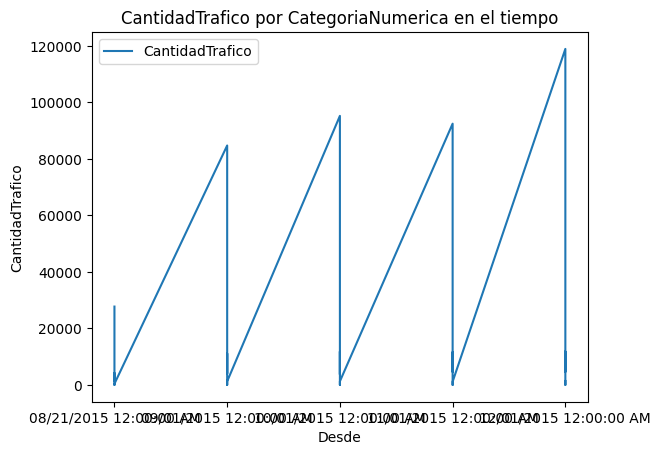

In [38]:
plt.plot(x, y1, label='CantidadTrafico')
plt.xlabel('Desde')
plt.ylabel('CantidadTrafico')
plt.title('CantidadTrafico por CategoriaNumerica en el tiempo')
plt.legend()
plt.show()


In [33]:
print(df_alvarado_2015['CategoriaNumerica'].dtype)


Int64


In [35]:
suma_categoria_1 = df_alvarado_2015[df_alvarado_2015['CategoriaNumerica'] == 1]['CantidadTrafico'].sum()
print(suma_categoria_1)



AttributeError: 'DataFrame' object has no attribute 'loc'